Lasso Regression = Extended Form of Linear Regression, built to avoid overfitting.

Lasso regression adds a regularization parameter(λ) to the loss function term of each weights of each datapoints, and during training of model, tries to minimize that modified loss/cost function. As a result, it tries to push the weight's contribution to 0 => This process is called Shrinkage => so contribution of some weights in moddel is neglected by making w_i to 0. Hence number of weights term km hone pr, apne aap model complexity ghat jayegi => overfitting will be avoided

This is by default automatic feature selection process

regularization parameter(λ) can be called as a hyperparameter

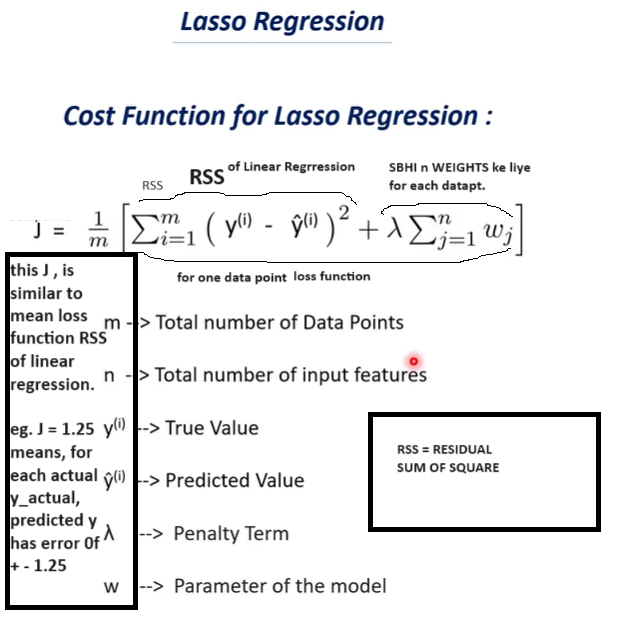

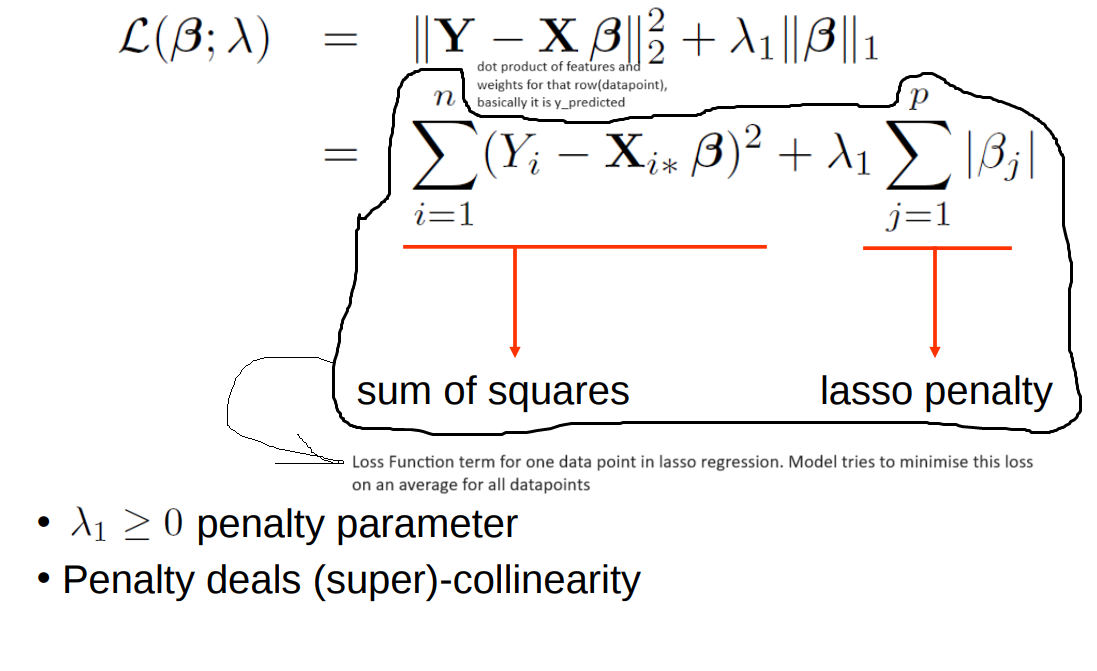

Lasso Regression is indeed an extension of Linear Regression with a regularization parameter (λ) that is introduced to mitigate overfitting. Also ka L1 regularization technique.

In Lasso Regression, a regularization term is added to the loss function, affecting the weights associated with each data point. During the training of the model, the objective is to minimize this modified loss or cost function. This regularization term encourages some of the weights (w_i) to become exactly 0, effectively leading to a feature selection process. This phenomenon is known as "shrinkage," where the contribution of certain weights is diminished or eliminated, simplifying the model by reducing its complexity. Consequently, as the number of non-zero weights decreases, the model's complexity is reduced, and this process helps prevent overfitting.

Here's a more formal and professional phrasing:

"Lasso Regression represents an extension of Linear Regression designed to address overfitting issues. It incorporates a regularization parameter (λ) into the loss function, which influences the weights associated with each data point. During the model training process, the objective is to minimize this adjusted loss function. Lasso Regression promotes a form of feature selection by driving some of the weight values (w_i) to precisely 0. This effect is commonly referred to as 'shrinkage.' As a result, certain weight contributions are reduced or eliminated, leading to a simpler model with fewer non-zero weight terms. This reduction in model complexity serves as a means to prevent overfitting."

# Gradient Descent for Cost Function effective minimization in Lasso Regression

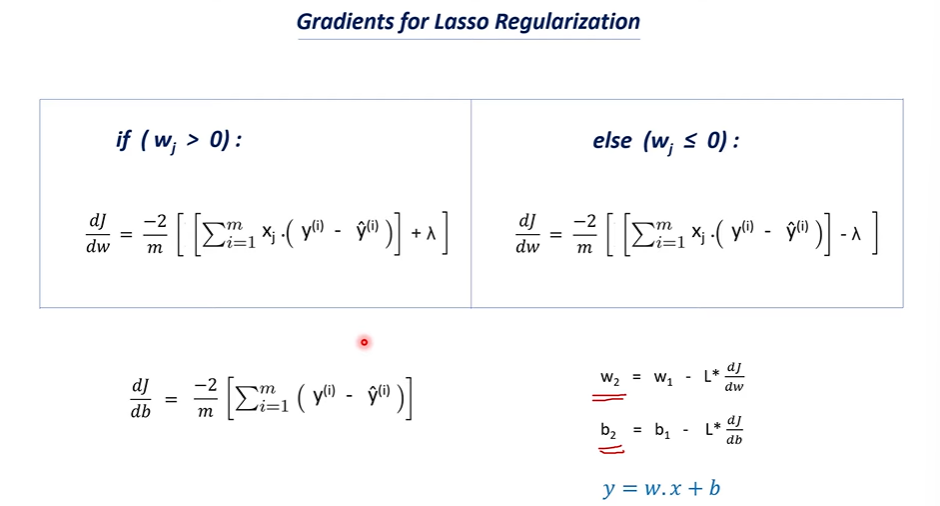

# Building Lasso Regression from scratch in python

Lasso Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db



**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

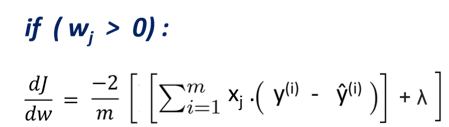



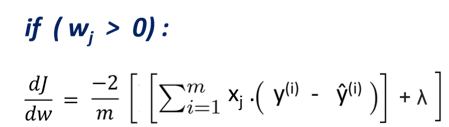

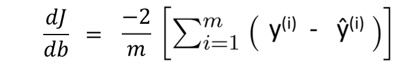

In [1]:
import numpy as np


In [3]:
# creating a class for lasso regrression

class Lasso_Regression():

  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  # fitting the dataset to the lasso regression model
  def fit(self, X, Y):
    # m - number of datapoints in the dataset -> number of rows
    # n - number of input features -> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n) # w = array of weights = number of features ke barabar size
    self.b = 0 # bias is only one
    self.X = X # x_train
    self.Y = Y # y_train
    # start with all 0, and find the optimum weights and bias for model

    # Implementing the gradient Descent algorithm for optimization

    for i in range(self.no_of_iterations):
      self.update_weights()


  # function for updating weights and bias
  def update_weights(self):

    # linear equation of the model
    y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weights
    dw = np.zeros(self.n)

    for i in range(self.n):
      if self.w[i] > 0 :
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - y_prediction)) + self.lambda_parameter)/self.m
      else :
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - y_prediction)) - self.lambda_parameter)/self.m

    # gradient for bias : ek hi hai, so for loop ke bahar
    db = -2 * np.sum(self.Y - y_prediction)/self.m

    # updating the weights and bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  # Predicting the target variables

  def predict(self, X): # X ke liye Y dena
    return X.dot(self.w) + self.b





In [ ]:
# model = Lasso_Regression()

In [ ]:
# model.fit()

To stop the iteration when the minimum loss is reached, you can implement a convergence criterion based on the change in loss between iterations. You can set a small threshold, and if the change in loss falls below this threshold, you can stop the training.

In [4]:
import numpy as np

class Lasso_Regression():

  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
        prev_loss = self.calculate_loss()
        self.update_weights()
        current_loss = self.calculate_loss()

        # Check for convergence based on the change in loss
        if abs(prev_loss - current_loss) < 1e-6:
            break

  def calculate_loss(self):
    y_prediction = self.predict(self.X)
    error = self.Y - y_prediction
    mse = np.mean(error ** 2)
    l1_regularization = self.lambda_parameter * np.sum(np.abs(self.w))
    loss = mse + l1_regularization
    return loss

  def update_weights(self):
    y_prediction = self.predict(self.X)
    dw = np.zeros(self.n)

    for i in range(self.n):
      if self.w[i] > 0:
        dw[i] = (-(2 * (self.X[:, i]).dot(self.Y - y_prediction)) + self.lambda_parameter) / self.m
      else:
        dw[i] = (-(2 * (self.X[:, i]).dot(self.Y - y_prediction)) - self.lambda_parameter) / self.m

    db = -2 * np.sum(self.Y - y_prediction) / self.m

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self, X):
    return X.dot(self.w) + self.b

# Example usage:
# lasso = Lasso_Regression(learning_rate=0.01, no_of_iterations=1000, lambda_parameter=0.1)
# lasso.fit(X, Y)
